### Online Retail Data Analysis

Source of Dataset: UCLA Library Repository

### Questions:

1. What are the sales figures for each country?
2. What is the overall sales trend?
3. How many new customers are there each month?
4. When do customers make the most purchases?
5. When were the largest orders made?
6. Which customers made the largest orders?


In [16]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline


In [17]:
# Load the dataset

retail = pd.read_excel('C:/Users/HP/Documents/Online_Retail.xlsx')

# check the top 5 rows

retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
# Examine the shape of the data

retail.shape

(541909, 8)

In [19]:
# Show dataset details

retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [20]:
# Check for duplicates
# Duplicates are due to repeat purchases
# No need to remove them

retail.duplicated().sum()


5268

In [21]:
# Check for missing values

retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### What are the sales figures for each country?

In [22]:
# show top 10 countries

retail.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)


Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Name: Quantity, dtype: int64

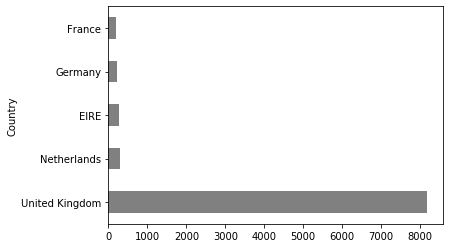

In [23]:
# Create revenue variable

retail['revenue'] = retail['Quantity']*retail['UnitPrice']/1000 # For ease of readability

# Group revenue by country

# Show top 5 countries for simplicity

retail.groupby('Country')['revenue'].sum().sort_values(ascending=False)[:5].plot(kind='barh', rot=0, color='grey')


### What is the overall sales trend?

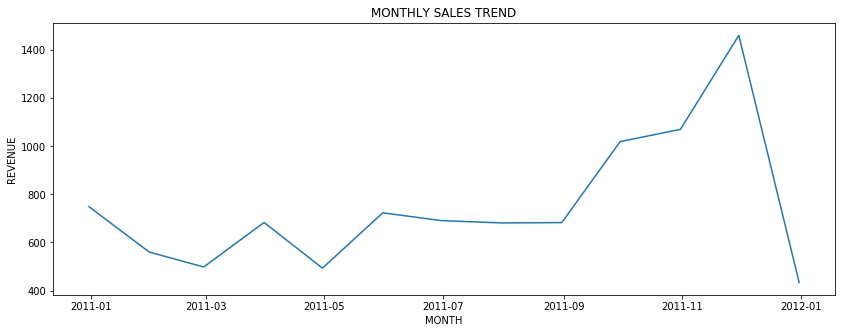

In [24]:
# Set invoice date as index

retail.set_index(pd.to_datetime(retail.InvoiceDate, format='%Y-%m-%d'),inplace=True)

# Group revenue by month

# Set chart size
plt.figure(figsize=(14,5))

# Plot chart

plt.plot(retail[['InvoiceDate','revenue']].groupby(pd.Grouper(freq='M')).sum()) #.plot(kind='line', rot=1, color='grey')

# Give plot title
plt.title("MONTHLY SALES TREND")

# Name y-axis
plt.ylabel("REVENUE")

# Name x-axis
plt.xlabel("MONTH")

# Display plot
plt.show()

### How many customers are there each month?

In [25]:
# Show customer counts

retail['CustomerID'].groupby(pd.Grouper(freq='M')).count()


InvoiceDate
2010-12-31    26850
2011-01-31    21912
2011-02-28    20363
2011-03-31    27822
2011-04-30    23198
2011-05-31    28908
2011-06-30    27836
2011-07-31    27502
2011-08-31    27662
2011-09-30    40822
2011-10-31    50695
2011-11-30    65598
2011-12-31    17661
Freq: M, Name: CustomerID, dtype: int64

### When do customers make the most purchases?

In [26]:
# Show the month with highest sales volume

retail['revenue'].groupby(pd.Grouper(freq='M')).sum(). sort_values(ascending=False)


InvoiceDate
2011-11-30    1461.756250
2011-10-31    1070.704670
2011-09-30    1019.687622
2010-12-31     748.957020
2011-05-31     723.333510
2011-06-30     691.123120
2011-03-31     683.267080
2011-08-31     682.680510
2011-07-31     681.300111
2011-01-31     560.000260
2011-02-28     498.062650
2011-04-30     493.207121
2011-12-31     433.668010
Name: revenue, dtype: float64

### Which is the best selling product in each country?

In [27]:
# create a new dataframe

retail_agg = (retail.groupby(['Country', 'Description']).agg({'Description': 'size'})
            .rename(columns={'Description': 'size'}))

# sort output

retail_agg = retail_agg.sort_values('size',ascending=False).groupby(level=0).head(1)#.sort_index()


# show firt 5 countries

retail_agg.head()


,,size
Country,Description,
United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2271
Germany,POSTAGE,383
France,POSTAGE,311
EIRE,CARRIAGE,108
Belgium,POSTAGE,98


### When were the largest orders made?

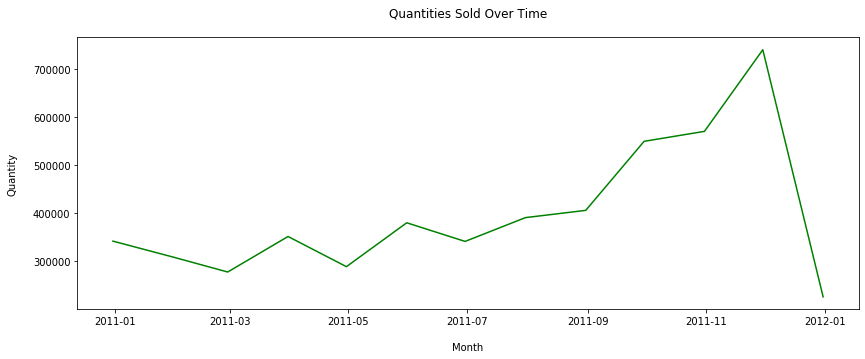

In [28]:
# create a new DataFrame
largest_order = retail[['InvoiceDate','Quantity']].groupby(pd.Grouper(freq='M')).sum()

# Set plot size
plt.figure(figsize=(14,5))


# Label chart
plt.plot(largest_order, color='green')
plt.title("Quantities Sold Over Time\n")
plt.ylabel("Quantity\n")
plt.xlabel("\nMonth")
 
    
# display plot

plt.show()


### Which customers made the largest orders?

In [29]:
# display output

pd.DataFrame(retail.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head())


,Quantity
CustomerID,
14646.0,196719
12415.0,77242
14911.0,77180
17450.0,69029
18102.0,64122


In [30]:
## 